In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('/content/delivery_time.csv')

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


#Correlation

In [89]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


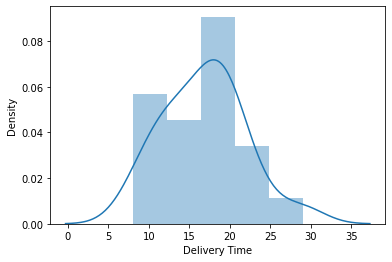

In [4]:
sns.distplot(df['Delivery Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


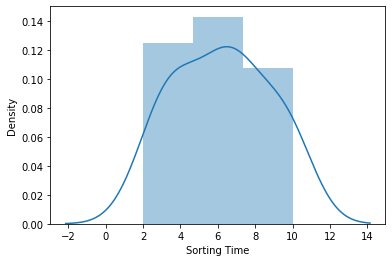

In [88]:
sns.distplot(df['Sorting Time'])

#box plot

{'boxes': [<matplotlib.lines.Line2D at 0x7fbd70ddbe50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbd70de4e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbd70deced0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbd70dec990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbd70de4410>,
  <matplotlib.lines.Line2D at 0x7fbd70de4950>]}

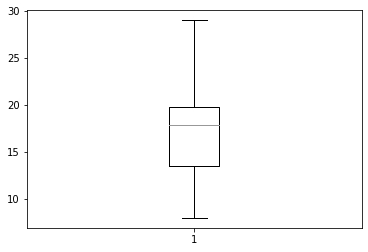

In [5]:
plt.boxplot(df['Delivery Time'],vert = True)

{'boxes': [<matplotlib.lines.Line2D at 0x7fbd70da7650>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbd7f58bbd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbd746370d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbd7126f310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbd70da7cd0>,
  <matplotlib.lines.Line2D at 0x7fbd70e05690>]}

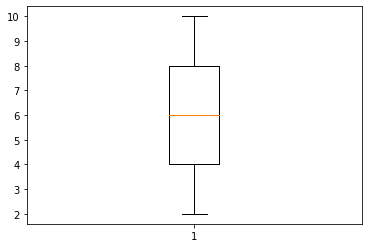

In [6]:
plt.boxplot(df['Sorting Time'],vert = True)

In [7]:
dd=df.rename({'Delivery Time':'DT','Sorting Time':'ST'},axis = 1)

In [8]:
dd.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [9]:
dd.describe()

,DT,ST
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [10]:
#Cheking for outliers

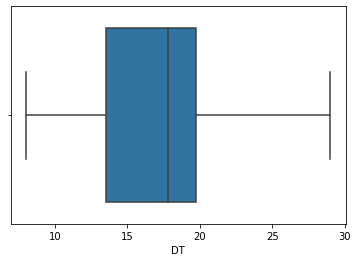

In [11]:
sns.boxplot(x='DT', data=dd)


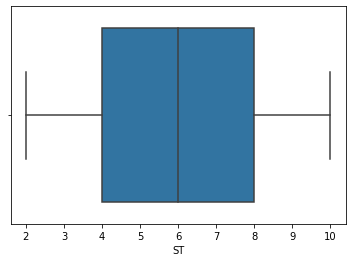

In [12]:
sns.boxplot(x='ST', data=dd)


#Hist plot


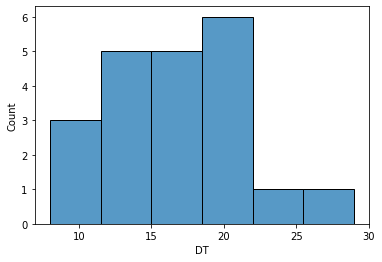

In [13]:
sns.histplot(dd.DT)

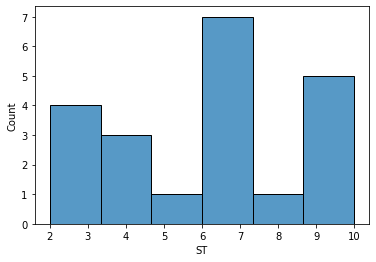

In [14]:
sns.histplot(dd.ST)

In [15]:
#Checking for duplicated rows

In [16]:
  model = smf.ols("DT~ST", data=dd).fit()


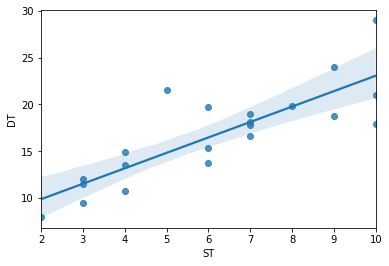

In [17]:
sns.regplot(x='ST', y='DT', data=dd)


In [18]:
print('P value is:', model.pvalues, '\n', '\n', 'Rsquared value is:',model.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model.rsquared )

P value is: Intercept    0.001147
ST           0.000004
dtype: float64 
 
 Rsquared value is: 0.6822714748417231 
 
 Adjusted Rsquared value is: 0.6822714748417231


#Iteration 1

In [20]:

dd['ST2'] = dd['ST']**2

In [21]:
dd.head(3)

,DT,ST,ST2
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36


In [22]:
model1= smf.ols('DT~ST2', data=dd).fit()

In [23]:
print('P value is:', model1.pvalues, '\n', '\n', 'Rsquared value is:',model1.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model1.rsquared )

P value is: Intercept    1.415704e-08
ST2          1.739194e-05
dtype: float64 
 
 Rsquared value is: 0.6302871815826638 
 
 Adjusted Rsquared value is: 0.6302871815826638


#Itertion 2

In [25]:
dd['logST'] = np.log(dd['ST'])

In [26]:
dd.head(3)

,DT,ST,ST2,logST
0,21.00,10,100,2.302585
1,13.50,4,16,1.386294
2,19.75,6,36,1.791759


In [27]:
model3= smf.ols('DT~logST', data=dd).fit()

In [28]:
print('P value is:', model3.pvalues, '\n', '\n', 'Rsquared value is:',model3.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model3.rsquared )

P value is: Intercept    0.641980
logST        0.000003
dtype: float64 
 
 Rsquared value is: 0.6954434611324224 
 
 Adjusted Rsquared value is: 0.6954434611324224


#Iteration 3


In [30]:

dd['sqrtST'] = dd['ST']**(1/2)

In [31]:
dd.head()

,DT,ST,ST2,logST,sqrtST
0,21.00,10,100,2.302585,3.162278
1,13.50,4,16,1.386294,2.000000
2,19.75,6,36,1.791759,2.449490
3,24.00,9,81,2.197225,3.000000
4,29.00,10,100,2.302585,3.162278


In [32]:
model4= smf.ols('DT~sqrtST', data=dd).fit()

In [33]:
print('P value is:', model4.pvalues, '\n', '\n', 'Rsquared value is:',model4.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model4.rsquared )

P value is: Intercept    0.410857
sqrtST       0.000003
dtype: float64 
 
 Rsquared value is: 0.695806227630867 
 
 Adjusted Rsquared value is: 0.695806227630867


#Model deletion diagnostics
#Cook's distance

#Interation 4

In [36]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


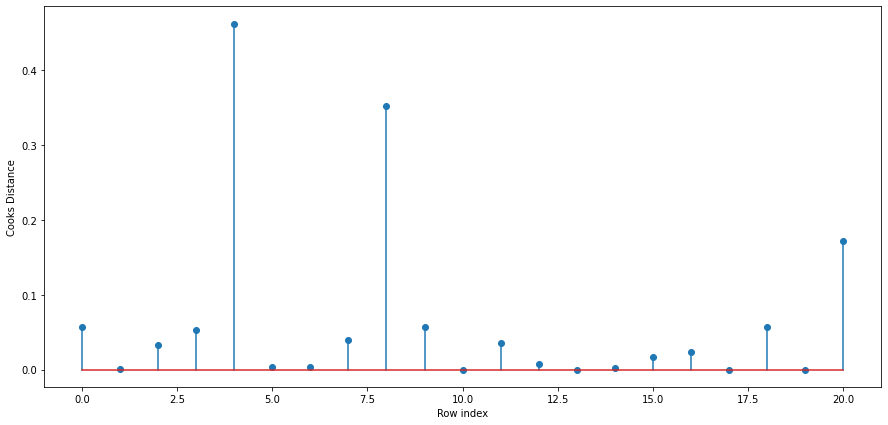

In [37]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(15, 7))
plt.stem(np.arange(len(dd)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
np.argmax(c), np.max(c)

(4, 0.462053041265031)

In [39]:
dd1= dd.drop([4],axis=0)

In [40]:
dd2 = dd1.reset_index()

In [41]:

dd3 = dd2.drop(['index'],axis=1)

In [42]:
model5 = smf.ols('DT~ST', data=dd3).fit()

In [43]:
print('P value is:', model5.pvalues, '\n', '\n', 'Rsquared value is:',model5.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model5.rsquared )

P value is: Intercept    0.000147
ST           0.000013
dtype: float64 
 
 Rsquared value is: 0.660207261776224 
 
 Adjusted Rsquared value is: 0.660207261776224


#Iteration 5

In [45]:
model_influence = model5.get_influence()
(c1, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


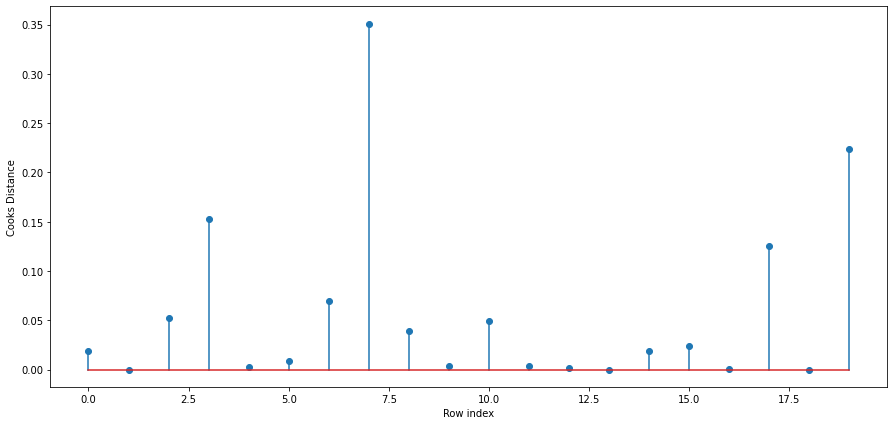

In [46]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(15, 7))
plt.stem(np.arange(len(dd3)), np.round(c1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [47]:
np.argmax(c1), np.max(c1)

(7, 0.3508974803877862)

In [48]:
dd4= dd3.drop([7],axis=0)

In [49]:
dd5= dd4.reset_index()

In [50]:
dd6= dd5.drop(['index'], axis=1)

In [51]:
model6= smf.ols('DT~ST', data=dd6).fit()

In [52]:
print('P value is:', model6.pvalues, '\n', '\n', 'Rsquared value is:',model6.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model6.rsquared )

P value is: Intercept    0.000420
ST           0.000005
dtype: float64 
 
 Rsquared value is: 0.714075554704391 
 
 Adjusted Rsquared value is: 0.714075554704391


#Since r squared value has increased, we'll try eliminating another influence point

#Iteration 6

In [55]:
model_influence = model6.get_influence()
(c2, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


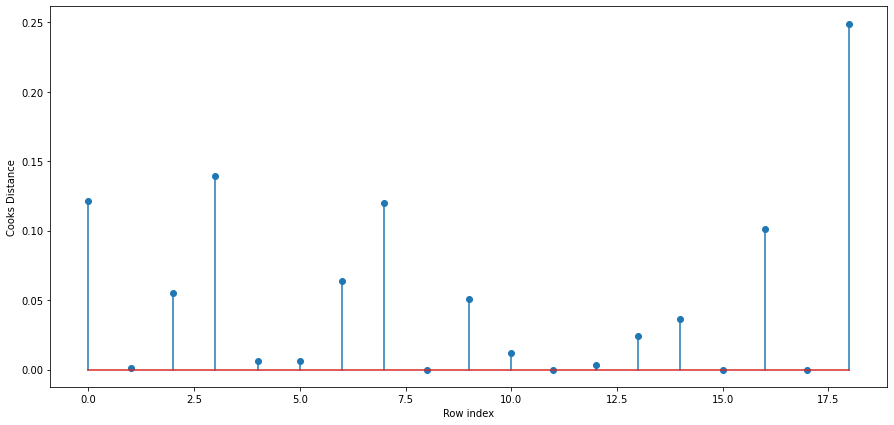

In [56]:

fig = plt.subplots(figsize=(15, 7))
plt.stem(np.arange(len(dd6)), np.round(c2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [57]:
np.argmax(c2), np.max(c2)

(18, 0.24932621731860286)

In [58]:
dd7= dd6.drop([18],axis=0)

In [59]:

dd8 = dd7.reset_index()

In [60]:
dd9 = dd8.drop(['index'],axis=1)

In [61]:
model7 = smf.ols('DT~ST', data=dd9).fit()

In [62]:

print('P value is:', model7.pvalues, '\n', '\n', 'Rsquared value is:',model7.rsquared, 
      '\n', '\n', 'Rsquared value is:', model7.rsquared )

P value is: Intercept    1.015144e-04
ST           1.273152e-07
dtype: float64 
 
 Rsquared value is: 0.8332330202945817 
 
 Rsquared value is: 0.8332330202945817


#Since r squared value has further increased, we'll try eliminating another influence point


#Iteration 7

In [65]:
model_influence = model7.get_influence()
(c3, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


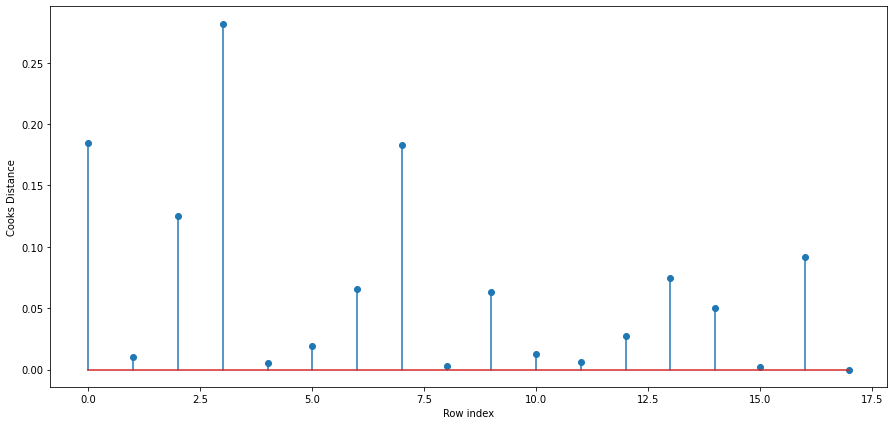

In [66]:
fig = plt.subplots(figsize=(15, 7))
plt.stem(np.arange(len(dd9)), np.round(c3, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [67]:
np.argmax(c3), np.max(c3)

(3, 0.2823735976855812)

In [68]:
dd10 = dd9.drop([3],axis=0)

In [69]:
dd11= dd10.reset_index()

In [70]:
dd12= dd11.drop(['index'],axis=1)

In [71]:
model8= smf.ols('DT~ST', data=dd12).fit()

In [72]:
print('P value is:', model8.pvalues, '\n', '\n', 'Rsquared value is:',model8.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model8.rsquared )

P value is: Intercept    3.646510e-05
ST           4.438326e-07
dtype: float64 
 
 Rsquared value is: 0.8259909851443229 
 
 Adjusted Rsquared value is: 0.8259909851443229


#Since r squared value has decreased, we'll not delete any influence point going further

#Hence the best rsquared value was at the end of iteration 6, i.e. 


In [74]:
print('R squared value after iteration 6',round(model7.rsquared,4))

R squared value after iteration 6 0.8332


#We can check the transformations once again with the improved dataset at the end of iteration 6

#Iteration 8

In [77]:
model9 = smf.ols('DT~ST+ST2',data=dd9).fit()

In [78]:
print('R squared value after iteration 8',round(model9.rsquared,4))

R squared value after iteration 8 0.844


#Since there's a slight increase, we'll try for other combinations as well

#Iteration 9

In [81]:

model10= smf.ols('DT~ST+ST2+logST',data=dd9).fit()

In [82]:
print('R squared value after iteration 9',round(model9.rsquared,4))

R squared value after iteration 9 0.844


#Since there's isn't any increase upto 4th decimal place, hence we can finalise the result of iteration 8 as the best model

In [84]:
df_final = dd9.drop(['logST','sqrtST'],axis=1)

In [85]:
df_final.head(3)

,DT,ST,ST2
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36


In [86]:
model_final = model9

In [87]:
print(model_final.params,'\n','\n',model_final.pvalues,'\n','\n',round(model_final.rsquared,4),'\n','\n',
      round(model_final.rsquared_adj,4))

Intercept    3.473031
ST           2.700664
ST2         -0.087270
dtype: float64 
 
 Intercept    0.229684
ST           0.019084
ST2          0.326135
dtype: float64 
 
 0.844 
 
 0.8231
